# Deivid Braian Smarzaro

# Introdução

Para transformar uma sequência binária em sinais elétricos, usa-se a codificação de linha. Há diversas formas de codificação de linha em uma transmissão a depender da aplicação. A técnica consiste em representar cada bit como um sinal elétrico com uma duração de tempo `T`, representada aqui como quantidade de amostras de bit. 
Para manter o sincronismo, algumas técnicas utilizam o _retorno a zero_, que é transformar a segunda metade de um sinal de nível alto em zero, o que mantém as variações de saída em caso de sequências de bits de mesmo nível lógico.

Ainda, é possível utilizar nível lógico alto negativo, como acontece na codificação **RZ inversão do 1** ou outra representação para bit, como ocorre na **Manchester**.

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42) #semente para gerar os mesmos números aleatórios

# Constantes

In [2]:
N = 1000 #quantidade de bits
A = 5 #Amplitude(V)
numero = np.random.randint(0,2,N) # gera um vetor de N bits aleatórios
amostras_por_bit = 8 #quantidade de amostras por bit
numero_amostrado = np.repeat(numero,amostras_por_bit) # repete cada bit pela quantidade de amostras

bits_no_grafico = 30
show_amostras = bits_no_grafico*amostras_por_bit

# NRZ Unipolar
Apenas 0's e 1's comum


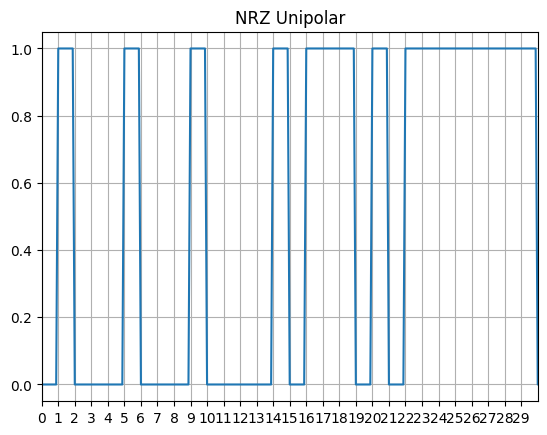

In [3]:
plt.plot(numero_amostrado) # Plota os 30 primeiros bits
plt.title('NRZ Unipolar')
plt.xlim(0,show_amostras)
plt.xticks(range(0,show_amostras,amostras_por_bit),range(0,show_amostras//amostras_por_bit))
plt.grid()
plt.show()

Apenas sinais positivos. O bit 0 é representado como ausência de tensão na transmissão. Essa codificação gera harmônicas indesejadas na rede.

# NRZ Bipolar
Troca os 0's por -1


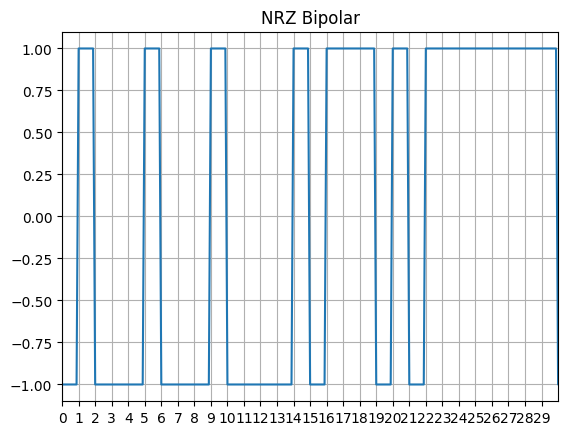

In [4]:
nrz_bipolar = numero_amostrado.copy()
nrz_bipolar[nrz_bipolar == 0] = -1 # Troca os 0's por -1
plt.plot(nrz_bipolar)
plt.xlim(0,show_amostras)
plt.xticks(range(0,show_amostras,amostras_por_bit),range(0,show_amostras//amostras_por_bit))
plt.grid()
plt.title('NRZ Bipolar')
plt.show()

Visa melhorar a densidade espectral a custo de transmissão de maior potência.

# RZ Unipolar


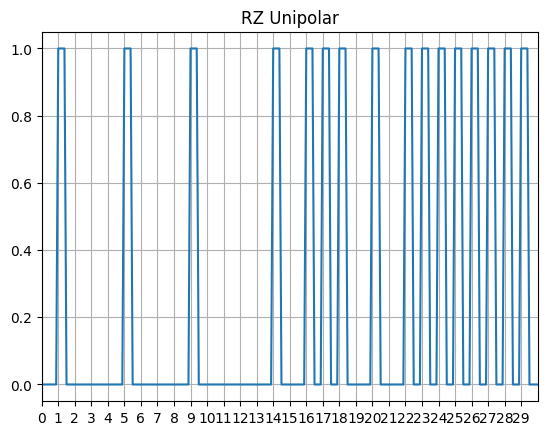

In [5]:
rz_unipolar = numero_amostrado.copy()

#A cada 8 numeros, transforma os 4 ultimos numeros em 0
for i in range(0, len(rz_unipolar), amostras_por_bit):
    rz_unipolar[i+amostras_por_bit//2:i+amostras_por_bit] = 0

plt.plot(rz_unipolar)
plt.xlim(0,show_amostras)
plt.xticks(range(0,show_amostras,amostras_por_bit),range(0,show_amostras//amostras_por_bit))
plt.grid()
plt.title('RZ Unipolar')
plt.show()

Reduz a potência necessária para transmissão, quando comparado ao NRZ Unipolar, entretanto exige maior uso de banda.

# RZ inversão do 1
O bit 0 é sempre 0, o bit 1 é alternadamente +1 e -1

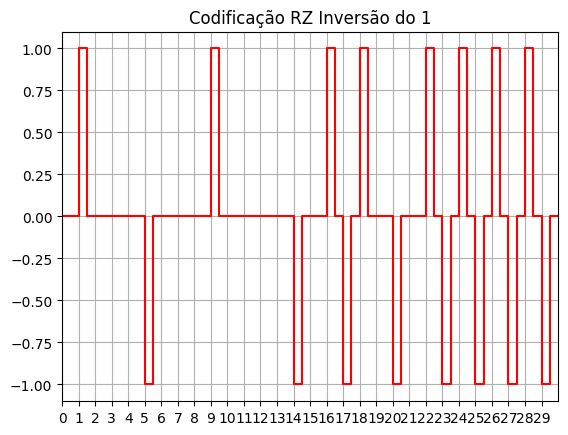

In [6]:
positive = True # True para positivo e False para negativo
rz_inversao = rz_unipolar.copy()
for bit in range(0,len(rz_unipolar),amostras_por_bit):
    if rz_unipolar[bit] == 1:
        if positive:
            rz_inversao[bit:bit+amostras_por_bit//2] = 1
            positive = False
        else:
            rz_inversao[bit:bit+amostras_por_bit//2] = -1
            positive = True

# Plotting
plt.plot(rz_inversao, color='red', drawstyle='steps-post')
plt.xlim(0,show_amostras)
plt.xticks(range(0,show_amostras,amostras_por_bit),range(0,show_amostras//amostras_por_bit))
plt.grid()
plt.title('Codificação RZ Inversão do 1')
plt.show()

Mais eficiente que o RZ Unipolar em questões de sincronismo e densidade espectral.

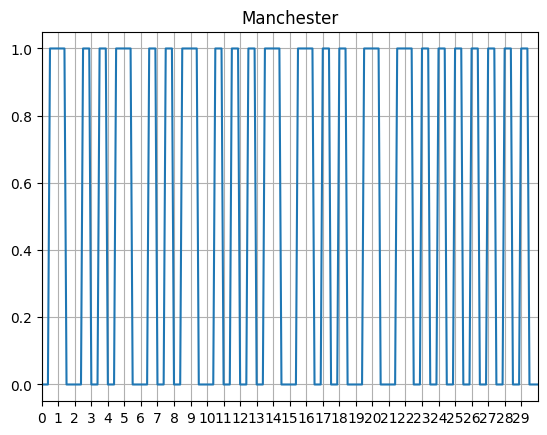

In [7]:
# Manchester G.E Thomas. (0 começa em 0 e termina em 1. 1 começa em 1 e termina em 0)
manchester = numero_amostrado.copy()
for i in range(0,len(manchester),amostras_por_bit):
    if manchester[i] == 0:
        manchester[i:i+amostras_por_bit//2] = 0
        manchester[i+amostras_por_bit//2:i+amostras_por_bit] = 1
    else:
        manchester[i:i+amostras_por_bit//2] = 1
        manchester[i+amostras_por_bit//2:i+amostras_por_bit] = 0

plt.plot(manchester)
plt.xlim(0,show_amostras)
plt.title('Manchester')
plt.xticks(range(0,show_amostras,amostras_por_bit),range(0,show_amostras//amostras_por_bit))
plt.grid()
plt.show()


# Conclusão

Através das simulações desenvolvidas em Python, foi possível reproduzir as codificações de linha propostas e comparar graficamente os resultados, além de compreender os algoritmos propostos por cada método. Ademais, ficam evidenciadas as necessidades de codificação, como sincronismo, menor potência de transmissão, menos harmônicas na rede elétrica e menor utilização de banda.